In [3]:
import pandas as pd 
import numpy as np 
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import plotly.express as px
from ac_models import RLC_T, integral_controller, standard_capacity, capacity_cost, thermal_demand, n_standard_capacity
import sys 
sys.path.append('/Users/wuzhenxiong/主营科研/红宝石项目/23年三月份整合/stat_mod_sim')
from scores import scores


In [2]:
'''
dataframes = {}
for i in [5,6,8]: #有效数据
    dataframes['df'+str(i)] = pd.read_csv('arranged_data1/sub_df'+str(i)+'.csv')
    #dataframes['df'+str(i)]['平均温度'] = 0.5 * (dataframes['df'+str(i)]['1号室内温度'] + dataframes['df'+str(i)]['2号室内温度'])

dataframes2 = {}
for i in range(11): #有效数据
    dataframes2['df'+str(i)] = pd.read_csv('arranged_data2/sub_df'+str(i)+'.csv')
    #df_val = dataframes2['df'+str(i)]

dataframes3 = {}
for i in range(9): #有效数据
    dataframes3['df'+str(i)] = pd.read_csv('arranged_data3/sub_df'+str(i)+'.csv')
'''
dataframes4 = {}
for i in range(33): #有效数据
    dataframes4['df'+str(i)] = pd.read_csv('arranged_data4/sub_df'+str(i)+'.csv')

# 数据提取

In [196]:
plants = pd.read_csv('Plant_data_halfhour.csv')

In [277]:

whole_time=[pd.to_datetime(day+' '+hour) for day,hour in zip(plants['Date'],plants['Time'])]
plants['time']=whole_time
plants['pixel diff']=plants['Area per plant'].diff(1)
plants=plants.set_index('time')
plants['time'] = plants.index
#plants = plants[:-1]
re_arranged_plants = pd.DataFrame({})

df_collection = []

for i in range(1,10):
    new_df = pd.DataFrame({})
    new = []
    times = []
    print(i)
    for j in range(len(plants)):
        if plants['No.'][j] == i:
            new.append(plants['Area per plant'][j])
            times.append(plants['time'][j])
    new_df['plant '+str(i)] = new
    new_df['plant '+str(i)+' diff'] = new_df['plant '+str(i)].diff(1)
    new_df['time'] = times 
    new_df['time'] = pd.to_datetime(new_df['time'])
    #new_df = new_df.set_index('time')
    #new_df.index = pd.to_datetime(new_df.index)
    #ew_df = new_df.resample('30m').mean()
    try:
        #new_df.resample('1H').mean()
        df_collection.append(new_df)
    except:
        pass


1
2
3
4
5
6
7
8
9


In [61]:
combine_df = dataframes4['df10']
for i in range(11,33):
    combine_df=combine_df.append(dataframes4['df'+str(i)])

In [314]:
combine_df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', '空调光期温度设定', '空调暗期温度设定', '空调温度上限设定',
       '空调温度下限设定', '新风机手动开度', '新风机手自动模式', '空调自动模式', '户外温度', '户外湿度', '1号室内温度',
       '1号室内湿度', '1号室内CO2浓度', '2号室内温度', '2号室内湿度', '2号室内CO2浓度', '1号PPFD',
       '1号色温', '1号PAR', '1号红比', '1号绿比', '1号蓝比', '2号PPFD', '2号色温', '2号PAR',
       '2号红比', '2号绿比', '2号蓝比', '3号PPFD', '3号色温', '3号PAR', '3号红比', '3号绿比',
       '3号蓝比', '1号风速', '2号风速', '营养液EC', '营养液PH', '营养液液温', '空调手动开关机',
       '空调开机指令下发', '空调手动模式选择', '空调风速选择', '空调手动温度设定', '空调手动操作指令下发', '空调手自动切换',
       '电磁阀手自动选择', '电磁阀手动开阀', '电磁阀手动关阀', '平均温度', '平均湿度', '灯具负荷', '自然负荷',
       '新风负荷', '总热渗入量'],
      dtype='object')

In [257]:
test_merge = pd.merge_asof(combine_df,df_collection[0],on='time')

In [302]:
merged_df = combine_df
for i in range(len(df_collection)):
    #print(i)
    merged_df = pd.merge_asof(merged_df,df_collection[i],on='time')
    #merged_df['plant ' + str(i+1) + ' diff'] = merged_df['plant '+str(i+1)].diff(1)
merged_df = merged_df.set_index('time')#每分钟数据
daily_df = merged_df.resample('1800s').mean()#半小时数据
#daily_merged_df = pd.merge(daily_df,plants,how='outer',left_index=True,right_index=True)

In [290]:

condition = (merged_df['plant 1 diff']>0)&(merged_df['plant 2 diff']>0)&(merged_df['plant 3 diff']>0)&(merged_df['plant 4 diff']>0)#&(merged_df['plant 5 diff']>0)&(merged_df['plant 6 diff']>0)&(merged_df['plant 7 diff']>0)&(merged_df['plant 8 diff']>0)&(merged_df['plant 9 diff']>0)
fig=px.line(merged_df[condition],y='平均温度')
fig.show()
fig=px.line(merged_df[condition],y='平均湿度')
fig.show()
fig=px.line(merged_df[condition],y='1号室内CO2浓度')
fig.show()
fig=px.line(merged_df[condition],y=['plant '+str(i)+' diff' for i in range(1,10)])
fig.show()


In [313]:
'''
condition = (daily_df['plant 7 diff']>0)#&(daily_df['plant 2 diff']>0)&(daily_df['plant 3 diff']>0)&(daily_df['plant 4 diff']>0)#&(daily_df['plant 5 diff']>0)&(daily_df['plant 6 diff']>0)#&(daily_df['plant 7 diff']>0)&(daily_df['plant 8 diff']>0)&(daily_df['plant 9 diff']>0)

fig=px.line(daily_df[condition]
            ,y='平均温度')
fig.show()
fig=px.line(daily_df[condition]
            ,y='平均湿度')
fig.show()
fig=px.line(daily_df[condition]
            ,y='1号室内CO2浓度')
fig.show()
fig=px.line(daily_df[condition]
            ,y=['plant '+str(i)+' diff' for i in range(1,10)])
fig.show()
'''
hetero_collection = []
#每一排都弄一波数据
for i in range(1,10):
    condition = (daily_df['plant ' + str(i) + ' diff']>0)
    daily_df[condition].to_csv('hetero_'+str(i)+'.csv')


# 温度控制

In [319]:
dataframes4['df29'] #第二十九个数据集/二十四号两点开始材料装好了

Unnamed: 0  Unnamed: 0.1   空调光期温度设定   空调暗期温度设定  空调温度上限设定  空调温度下限设定  \
0          20621         20621  22.799999  19.200001      19.5      18.5   
1          20622         20622  22.799999  19.200001      19.5      18.5   
2          20623         20623  22.799999  19.200001      19.5      18.5   
3          20624         20624  22.799999  19.200001      19.5      18.5   
4          20625         20625  22.799999  19.200001      19.5      18.5   
...          ...           ...        ...        ...       ...       ...   
1275       21896         21896  23.000000  19.500000      19.5      18.5   
1276       21897         21897  23.000000  19.500000      19.5      18.5   
1277       21898         21898  23.000000  19.500000      19.5      18.5   
1278       21899         21899  23.000000  19.500000      19.5      18.5   
1279       21900         21900  23.000000  19.500000      19.5      18.5   

      新风机手动开度  新风机手自动模式  空调自动模式       户外温度  ...  电磁阀手自动选择  电磁阀手动开阀  电磁阀手动关阀  \
0         0.0     False    True  14.959492  ...     False    False    False   
1         0.0     False    True  14.858215  ...     False    False    False   
2         0.0     False    True  14.858215  ...     False    False    False   
3         0.0     False    True  14.759838  ...     False    False    False   
4         0.0     False    True  14.759838  ...     False    False    False   
...       ...       ...     ...        ...  ...       ...      ...      ...   
1275      0.0     False    True  17.745949  ...     False    False    False   
1276      0.0     False    True  17.635998  ...     False    False    False   
1277      0.0     False    True  17.717014  ...     False    False    False   
1278      0.0     False    True  17.916668  ...     False    False    False   
1279      0.0     False    True  18.020832  ...     False    False    False   

                            time       平均温度       平均湿度    灯具负荷      自然负荷  \
0     2023-04-24 14:08:19.254484  20.150001  74.350002  0.7708 -3.701079   
1     2023-04-24 14:09:20.261255  19.900000  73.050003  0.7708 -3.595032   
2     2023-04-24 14:10:21.311715  19.700000  76.000000  0.7708 -3.452422   
3     2023-04-24 14:11:22.295891  19.700000  79.150002  0.7708 -3.522570   
4     2023-04-24 14:12:23.386978  19.750000  80.000000  0.7708 -3.558222   
...                          ...        ...        ...     ...       ...   
1275  2023-04-25 11:52:19.291816  20.250000  78.349998  0.0000 -1.785507   
1276  2023-04-25 11:53:20.543211  20.400000  79.800003  0.0000 -1.970865   
1277  2023-04-25 11:54:21.769652  20.450000  80.799999  0.0000 -1.948748   
1278  2023-04-25 11:55:22.959428  20.500000  78.899998  0.0000 -1.842038   
1279  2023-04-25 11:56:24.199599  20.500000  78.250000  0.0000 -1.767765   

          新风负荷     总热渗入量  
0    -3.701079 -6.631359  
1    -3.595032 -6.419263  
2    -3.452422 -6.134045  
3    -3.522570 -6.274340  
4    -3.558222 -6.345645  
...        ...       ...  
1275 -1.785507 -3.571015  
1276 -1.970865 -3.941729  
1277 -1.948748 -3.897497  
1278 -1.842038 -3.684077  
1279 -1.767765 -3.535529  

[1280 rows x 57 columns]

In [8]:

df = dataframes4['df29']

xdata_T = df['空调手动模式选择'][:-1],df['空调风速选择'][:-1], df['户外温度'][:-1], df['平均温度'][:-1],df['空调手动温度设定'][:-1], df['灯具负荷'][:-1],df['自然负荷'][:-1],df['新风负荷'][:-1]

T_params, T_covs = curve_fit(standard_capacity, xdata_T, df['平均温度'][1:], 
                             p0=np.concatenate([[0.1 for i in range(5)] for i in range(8)]),
                             #bounds=(),
                             
                             ) #1热容-4新风参数-(5空调参数-4空调模式)

/Users/wuzhenxiong/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [4]:
for i in range(29,len(dataframes4)): #有效数据
    print(i)
    df_val = dataframes4['df'+str(i)]
    print(len(df_val))
    xdata_val = df_val['空调手动模式选择'][:-1], df_val['空调风速选择'][:-1], df_val['户外温度'][:-1], df_val['平均温度'][:-1],df['空调手动温度设定'][:-1], df_val['灯具负荷'][:-1],df_val['自然负荷'][:-1],df_val['新风负荷'][:-1]
    fit = standard_capacity(xdata_val, *T_params)
    real = df_val['平均温度'][1:]
    print(scores(fit[:len(real)],real))

29
1280
([0.9853218122839253], [0.12378036956301007], [0.3380806110463258])
30
1510
([0.9964527630738221], [0.06506736829076966], [0.1617237504974834])
31
100
([0.9760587787022306], [0.043948616523997334], [0.19638397941055025])
32
1170
([0.9605287085043229], [0.13369051076636032], [0.3660262006421057])


In [5]:
T_params

array([-3.87224596e-04,  1.94461389e+00, -1.05426703e+00,  9.19109556e-01,
        1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  1.78936909e+00, -1.42504181e+00,  5.67006174e-01,
       -5.23581130e-02, -1.09956889e+01, -2.90937025e+00,  1.13730093e+00,
        1.24557843e+00, -1.36909011e+01,  2.45509127e+00, -7.32950552e-01,
        6.32725867e-02,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  1.00000000e-01])

In [18]:
from led_models import round_1_led,light_module,modules_control
round_1_led()

(1927, 770.8000000000001)

In [6]:
df = dataframes4['df31']

In [45]:
test_x = 1, 6, None, 22.1 ,None, df['灯具负荷'][:-1].mean(),df['自然负荷'][:-1].mean(),df['新风负荷'][:-1].mean()
#模式，档位，室外温度，室内温度，设定温度，其它热源
predict_T = standard_capacity(test_x, *T_params), capacity_cost(test_x,*T_params) #kW
#一分钟预测 or 五分钟预测
predict_T #其实因为模式不多，只要是制冷问题，直接遍历一下即可

(22.05051961135682, -2.3419880767224974)

In [9]:
#要确保当 当前温度高于目标温度时，它识别到的是需要负数demand，这样它才会制冷
demand_x = 20, 0.5,df['灯具负荷'][:-1].mean(),df['自然负荷'][:-1].mean(),df['新风负荷'][:-1].mean() #N, diff, light, nature, fresh
thermal_demand(demand_x,*T_params)

optimal_intensity = 1
optimal_N = 1
obj_T = 22 #
curr_T = 22.3
mini_diff = 0.7

for n in range(1,15):
    for i in range(2,8):
        test_x = n, 1, i, None, curr_T ,None, df['灯具负荷'][:-1].mean(),df['自然负荷'][:-1].mean(),df['新风负荷'][:-1].mean()
        #demand_x = n, 0.5,df['灯具负荷'][:-1].mean(),df['自然负荷'][:-1].mean(),df['新风负荷'][:-1].mean()
        #estimate_demand = thermal_demand(demand_x,*T_params)
        #estimate_capacity = capacity_cost(test_x, *T_params)
        estimate_new_T = n_standard_capacity(test_x, *T_params)
        diff_T = abs(estimate_new_T-obj_T)
        if diff_T < mini_diff:
            optimal_intensity = i 
            optimal_N = 1
            mini_diff = diff_T



In [11]:
optimal_intensity,optimal_N, mini_diff

(7, 1, 0.015004239100349537)

In [ ]:
#统计下历史制冷量与制热量

In [7]:
obj_T = 24

diff =  obj_T - predict_T #差多少

In [8]:
#负荷计算/也可以直接给定温度
from ac_models import thermal_demand
load_xdata = 60, diff,0.8,1,1 #demand里头算得diff是goal-current
thermal_demand(load_xdata,*T_params)#kW

-0.6471510977997978

In [9]:
from sko.GA import GA

In [10]:
#限制函数是目标温度，目标函数是直接换算功率
#模式，档位，耗时(过渡期的时候)
controller = integral_controller()

controller.thermal_demand = thermal_demand(load_xdata,*T_params)#kW
controller.obj_T = 23.5
controller.T_params = T_params
controller.outdoor_T = 12
controller.current_T = 24
controller.predicted_load = df['总热渗入量'][:200]#kW


#eq_cstr = [
#    lambda x: standard_capacity(x) - obj_T
#]

optimizer = GA(
    func=controller.optimal_load,
    n_dim=3,
    lb=[1,1,1],
    ub=[30,4,7],
    #constraint_eq=eq_cstr,
    precision=1
)

x,y = optimizer.run()

AttributeError: 'integral_controller' object has no attribute 'predicted_lights'

In [11]:
x,y

(array([30.,  1.,  1.]), array([21.80781228]))

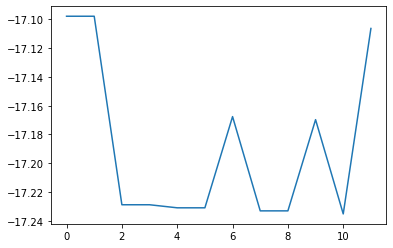

In [13]:
df['总热渗入量'][:200][:12].plot()

In [12]:
x,y

(array([93.,  1.,  5.]), array([0.00916109]))

# 能耗模型重制

In [37]:
#mode_a_b_c_d, intensity

power_cost_data = pd.DataFrame({
    #'time':['15:01','15:10','15:21','15:30','15:40',
    #        '15:50','16:00','16:10','16:20','16:30','16:43'
    #        '16:50','17:00'],
    'power':[32.46,32.67,32.90,33.11,33.32,33.56,33.82,
             34.07,34.28,34.50,34.80,34.96,35.19]
})

In [39]:
power_cost_data['power'][-4:].diff(1)

9      NaN
10    0.30
11    0.16
12    0.23
Name: power, dtype: float64

In [35]:
dataframes3['df1']['time'][3:-6]

3     2023-03-21 16:29:59.349977
4     2023-03-21 16:31:00.116016
5     2023-03-21 16:32:00.895184
6     2023-03-21 16:33:01.652976
7     2023-03-21 16:34:02.422452
8     2023-03-21 16:35:03.217743
9     2023-03-21 16:36:03.968530
10    2023-03-21 16:37:05.195503
11    2023-03-21 16:38:05.976989
12    2023-03-21 16:39:06.733915
13    2023-03-21 16:40:07.499491
14    2023-03-21 16:41:08.257767
15    2023-03-21 16:42:09.013255
16    2023-03-21 16:43:09.772197
17    2023-03-21 16:44:10.517002
18    2023-03-21 16:45:11.287422
19    2023-03-21 16:46:12.057595
20    2023-03-21 16:47:13.285883
21    2023-03-21 16:48:14.060821
22    2023-03-21 16:49:14.824675
23    2023-03-21 16:50:15.572452
24    2023-03-21 16:51:16.372991
25    2023-03-21 16:52:17.143096
26    2023-03-21 16:53:18.100670
27    2023-03-21 16:54:18.961398
28    2023-03-21 16:55:19.904742
29    2023-03-21 16:56:20.725562
30    2023-03-21 16:57:21.849486
31    2023-03-21 16:58:22.655010
32    2023-03-21 16:59:23.518469
33    2023

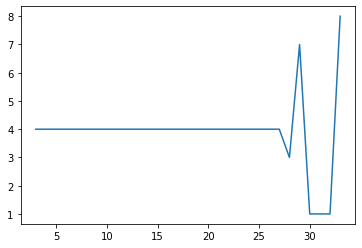

In [40]:
dataframes3['df1']['空调手动模式选择'][3:-6].plot()

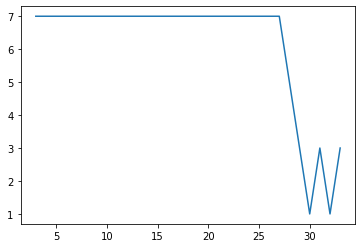

In [41]:
dataframes3['df1']['空调风速选择'][3:-6].plot()